In [1]:
import scvelo as scv
from IPython.display import clear_output
import matplotlib.backends.backend_pdf
from tqdm import tnrange, tqdm_notebook
import scanpy as sc
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline


scv.logging.print_version()
scv.settings.set_figure_params(
    'scvelo', dpi_save=150, dpi=80, transparent=True)
scv.settings.verbosity = 2

Running scvelo 0.1.16.dev32+c00a55e.dirty (python 3.6.6) on 2020-12-14 15:43.


In [2]:
# paths and names
data_path='G:/data/scSLAMseq/revision/'
signatures_path='G:/data/scrnaseq_signature_collection/'
libraries = ['AB', 'CE', 'DF']
donors=['B2-040', 'C2-019', 'OT227', 'OT302', 'P009T', 'P013T']
pert_colors=['#febf32', '#a6a6a6', '#0070c0', '#8d5615', '#ff49ff', '#fc0b1b']

sigs_C=['Stem_Lgr5_ISC-Merlos', 'TC1', 'TC4']

single_genes = ['LGR5', 'OLFM4', 'TFF3', 'FABP1', 'EPHB2', 'AXIN1', 'AXIN2', 'EGR1']

colors=[
    'Stem_Lgr5_ISC-Merlos', 'Stem', 'Enterocytes 1', 'Enterocytes 2', 'TC1', 'TC2', 'TC3', 'TC4', 'Goblet',
    'phase', 'percent_ribosomal', 'perturbation', 'YAP_targets', 'MAPK_progeny', 'Stem', 'Stem_TA 1', 'Stem_TA 2', 'Stem_TA 3', 'schinken'
] # 'Stem_Lgr5_ISC-Munoz', 

# Tests / Manual

In [6]:
# normalize over donors:
if False:
    p=1  # percentile
    mins = []
    maxs = []
    for donor in tqdm_notebook(donors):
        adata = sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed_ccreg.h5')
        mi,ma = np.percentile(adata.obs[sigs_C], p, axis=0), np.percentile(adata.obs[sigs_C], 100-p, axis=0)
        mins.append(mi)
        maxs.append(ma)
        del adata
    mi = np.min(mins, axis=0)
    ma = np.max(maxs, axis=0)
else:  # for ccreg, sigs_C=['Stem_Lgr5_ISC-Merlos', 'TC1', 'TC4'], p=1
    mi = [-0.09335803, -0.3275801 , -0.29309243]
    ma = [0.11455422, 0.19976651, 0.21365658]
mo = np.max(np.abs([mi,ma]), axis=0)  # make colorbar symmetric

In [7]:
# load preformated and filtered data (not normalized and logscaled)
donor = donors[-1]
adata = sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed_ccreg.h5')

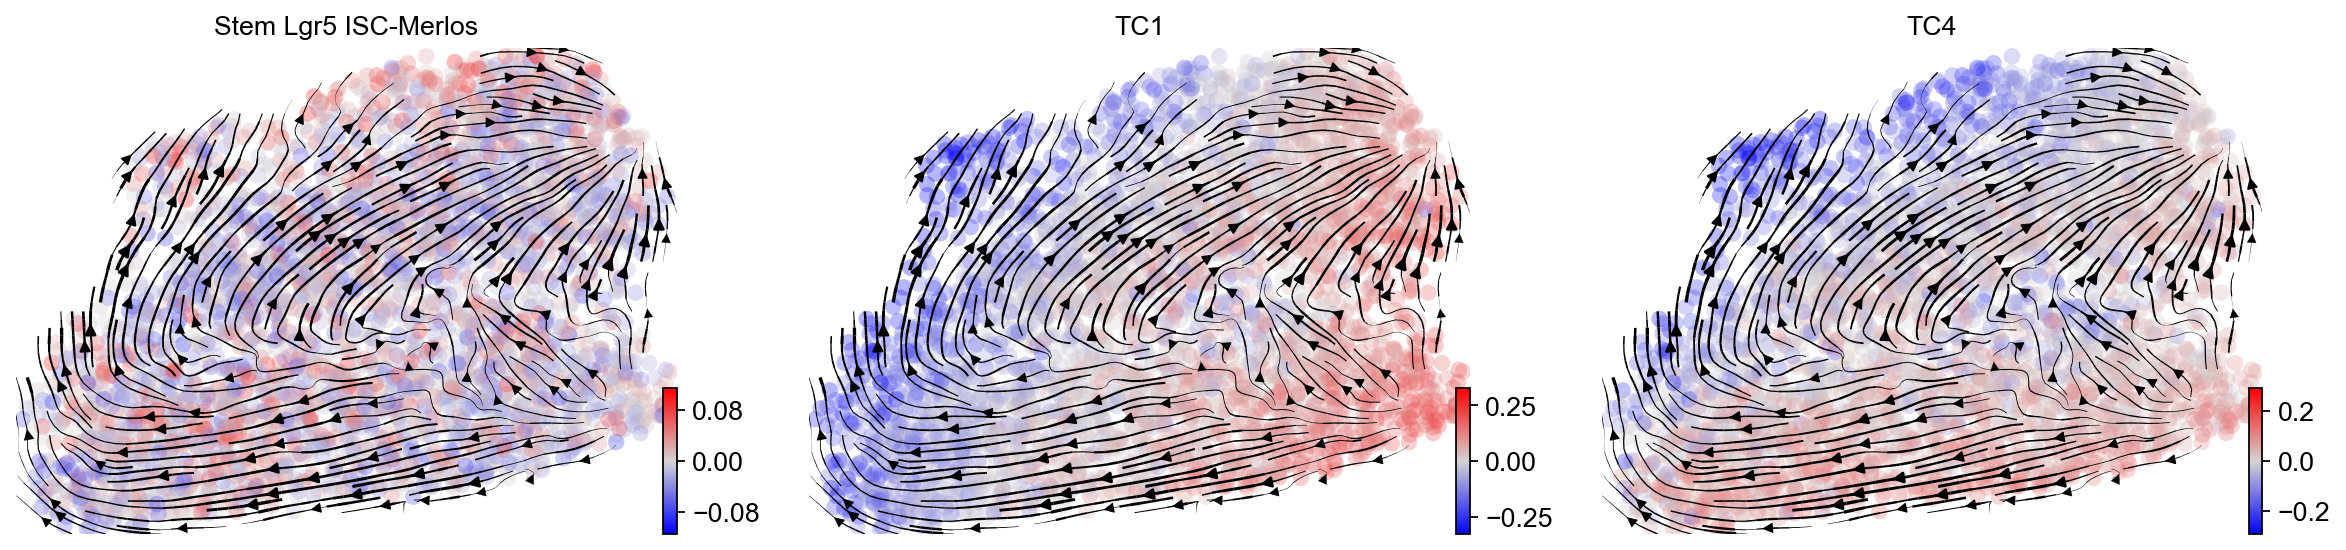

In [44]:
# check
from scvelo.plotting.utils import rgb_custom_colormap
cmap=rgb_custom_colormap(colors=['blue', 'lightgrey', 'red'], alpha=[0.3,0.3,0.3])

axs =scv.pl.scatter(adata, basis='umap', color=sigs_C, legend_loc='right_margin', perc=[1,99], ncols=4, show=False, s=0, colorbar=False, title='')
for i in range(3):
    scv.pl.velocity_embedding_stream(adata, color=sigs_C[i], perc=[1,99], vkey='SLAM_velocity', 
                                     legend_loc='right_margin', sort_order=False, colorbar=True, 
                                     cmap=cmap, vmin=-mo[i], vmax=mo[i], ax=axs[i], show=False)
pl.show()

In [45]:
# load preformated and filtered data (not normalized and logscaled)
donor = donors[-2]
adata = sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed_ccreg.h5')

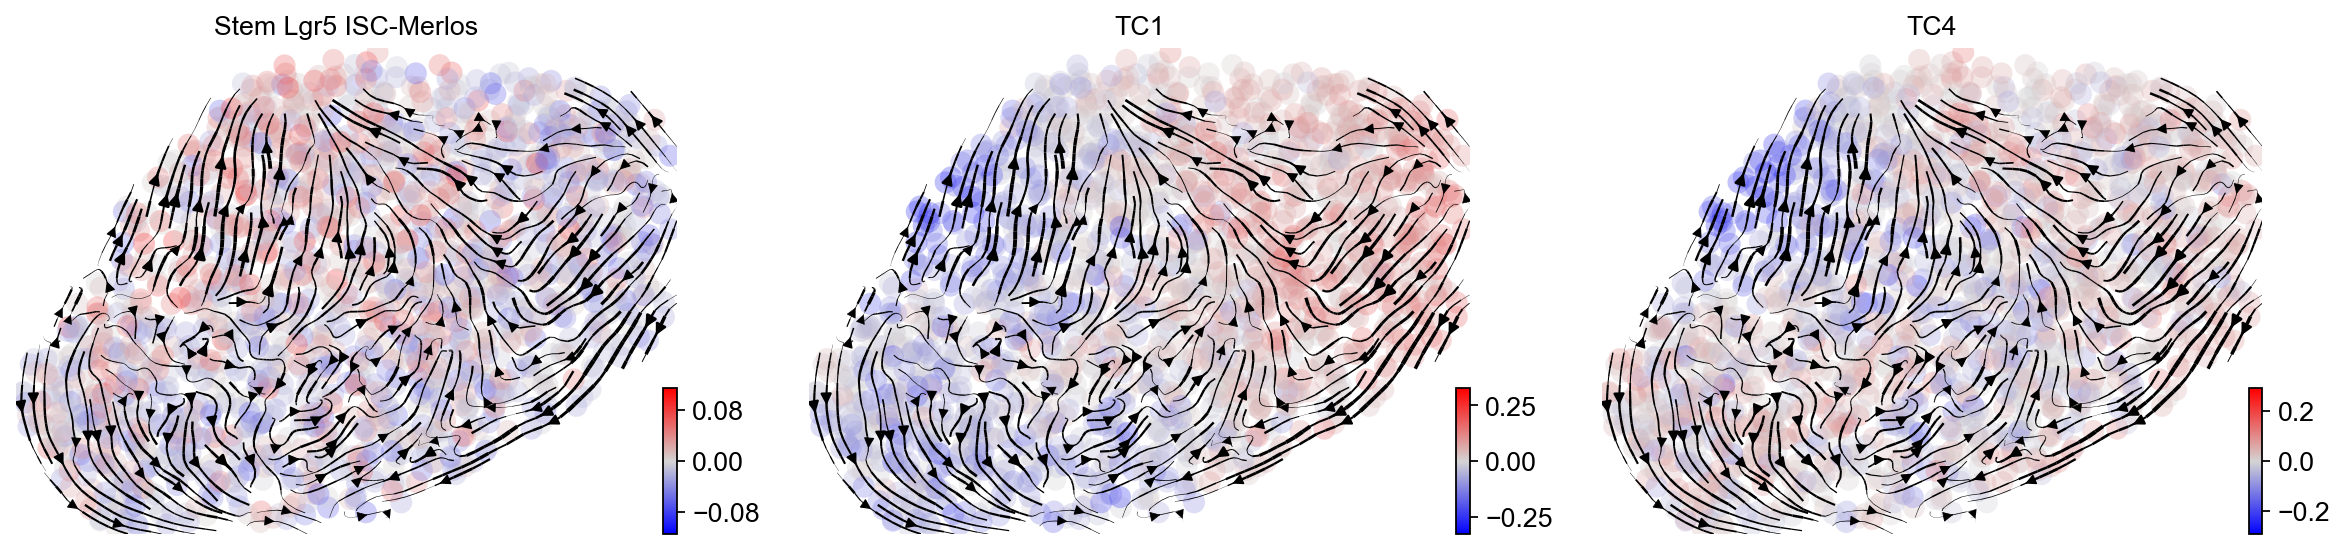

In [46]:
# check
from scvelo.plotting.utils import rgb_custom_colormap
cmap=rgb_custom_colormap(colors=['blue', 'lightgrey', 'red'], alpha=[0.3,0.3,0.3])

axs =scv.pl.scatter(adata, basis='umap', color=sigs_C, legend_loc='right_margin', perc=[1,99], ncols=4, show=False, s=0, colorbar=False, title='')
for i in range(3):
    scv.pl.velocity_embedding_stream(adata, color=sigs_C[i], perc=[1,99], vkey='SLAM_velocity', 
                                     legend_loc='right_margin', sort_order=False, colorbar=True, 
                                     cmap=cmap, vmin=-mo[i], vmax=mo[i], ax=axs[i], show=False)
pl.show()

In [24]:
# vkwargs = {'basis':'umap', 'perc':[1, 99], 'ncols':4, 'show':False}
# scv.pl.velocity_embedding_grid(adata, color='perturbation', legend_loc=False, groups=['DMSO'],
#                                arrow_size=5, arrow_length=5, arrow_color='k', density=0.6, min_mass=20, alpha=0, vkey='SLAM_velocity', **vkwargs)

In [25]:
# axs=scv.pl.scatter(adata, basis='umap', color='perturbation', legend_loc='right_margin', perc=[1,99], ncols=4, show=False, s=100)
# axs=scv.pl.velocity_embedding_stream(adata, basis='umap', color='perturbation', legend_loc='right_margin', perc=[1,99], ncols=4, show=False, ax=axs, size=0, vkey='SLAM_velocity')

In [26]:
# # this convenient plot only works if color is perturbation...
# scv.pl.velocity_embedding_stream(adata, basis='umap', color='perturbation', legend_loc='right_margin', perc=[1,99], ncols=4, groups=['DMSO'], vkey='SLAM_velocity')

# systematic

In [7]:
figure_path='G:/data/figures/'
scv.settings.figdir=figure_path
scv.settings.plot_prefix=''

# options
basises = ['umap', 'diffmap']
plottings = ['stream', 'grid']
vfitting = 'jointly' # ['jointly', 'single']
reKNN = True # [False, True]
regress_cc = True#[False, True]
velocity_modes = 'stochastic'#['stochastic', 'dynamical']

colors=[
    'Stem_Lgr5_ISC-Munoz', 'Stem_Lgr5_ISC-Merlos', 'Stem', 'Enterocytes 1', 'Enterocytes 2', 'TC1', 'TC2', 'TC3', 'TC4', 'Goblet',
    'phase', 'percent_ribosomal', 'perturbation', 'YAP_targets', 'Stem', 'Stem_TA 1', 'Stem_TA 2', 'Stem_TA 3', 'MAPK_progeny'
]

In [64]:
# jointly fitted, jointly plotted, cc regressed out, streamplot, stochastic model, KNN cut up
for donor in donors:
    adata=sc.read(data_path+'by_donors/SLAM_'+donor+'.h5')

    adata=prepare(adata)
    adata=annotate(adata, regress_cc=True)
    adata = embedd(adata)
    adata = restrict_KNN(adata)
    
    scv.tl.velocity(adata)
    scv.tl.velocity_graph(adata)
    
    for basis in ['umap', 'diffmap']:
        # bug: can not set arrow_color when giving color.
        kwargs = {'legend_loc': 'right_margin', 'perc': [1,99], 'ncols': 4, 'show': False, 'color': colors}
#         scv.pl.velocity_embedding_grid(adata, basis=basis, size=250, arrow_size=5, alpha=.4,
#                                        arrow_length=5, density=0.4, min_mass=20, arrow_color='k',
#                                        save=donor+'_'+basis+'_grid.png', **kwargs
#                                       )
        scv.pl.velocity_embedding_stream(adata, basis=basis, save=donor+'_'+basis+'_stream.png', **kwargs)
    clear_output()

In [16]:
# single
for donor in donors:
    adata=sc.read(data_path+'by_donors/SLAM_'+donor+'.h5')

    adata=prepare(adata)
    adata=annotate(adata, regress_cc=regress_cc)
    adata = embedd(adata)
    adata = restrict_KNN(adata)
    
    scv.tl.velocity(adata)
    scv.tl.velocity_graph(adata)
    
    n=len(colors)
    for pert in pd.unique(adata.obs.perturbation):
        bdata = adata[adata.obs.perturbation==pert].copy()
        cdata = adata[adata.obs.perturbation!=pert].copy()
        axs=scv.pl.scatter(adata, basis='umap', title=list(np.array(np.arange(0,n), dtype=str)), ncols=4, show=False, size=250, alpha=0)
        for ax, c in zip(axs, colors):
            # grey background scatter of everything except pert
            scv.pl.scatter(cdata, basis='umap', color='grey', show=False, size=250, alpha=0.07, ax=ax)
            # velocity subset and color of pert only
            ax=scv.pl.velocity_embedding_grid(bdata, basis='umap', size=250, color=c, legend_loc='right_margin', perc=[1,99], 
                                              ncols=4, show=False, ax=ax, arrow_size=5, arrow_length=5, arrow_color='k', density=0.4, min_mass=20, alpha=.4, title=donor+' '+pert+' '+c)
        # save figure
        fig=pl.gcf()
        pl.savefig(figure_path + donor+'_'+pert+"_umap_grid.png")
        pl.show()
        clear_output()

# systemic decomposed

In [12]:
figure_path='G:/data/figures/decomposed_umaps/'
scv.settings.figdir=figure_path
scv.settings.plot_prefix=''

In [13]:
# jointly fitted, cc NOT regressed out, streamplot and gridplot, stochastic model, KNN cut up
ccreg = True

for donor in donors:
    cckey= '' if ccreg else 'not'
    cc = '_ccreg' if ccreg else ''
    adata=sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed'+'_ccreg'+'.h5')
    
    kwargs = {'basis':'umap', 'perc':[1, 99], 'ncols':4, 'show':False, 'cmap': 'magma'}
    
    # joint umaps
    scv.pl.scatter(adata, color=colors, legend_loc='right_margin', save=donor+'_umap_cc'+cckey+'regressed_signatures.pdf', **kwargs)
    scv.pl.scatter(adata, color=single_genes, legend_loc='right_margin', save=donor+'_umap_cc'+cckey+'regressed_genes.pdf', **kwargs)
    
    # joint velocities
    scv.pl.velocity_embedding_grid(adata, color='perturbation', legend_loc=False,
                                   arrow_size=5, arrow_length=5, arrow_color='k', density=0.6, min_mass=20, alpha=0,
                                   vkey='SLAM_velocity', save=donor+'_umap_cc'+cckey+'regressed_grid_SLAMvelo_only.pdf',**kwargs)
    scv.pl.velocity_embedding_grid(adata, color='perturbation', legend_loc=False,
                                   arrow_size=5, arrow_length=5, arrow_color='k', density=0.6, min_mass=20, alpha=0,
                                   vkey='real_velocity', save=donor+'_umap_cc'+cckey+'regressed_grid_Classicalvelo_only.pdf',**kwargs)
#     scv.pl.velocity_embedding_stream(adata, color='perturbation', legend_loc=False, vkey='SLAM_velocity', alpha=0,
#                                      save=donor+'_umap_ccnotregressed_stream_SLAMvelo_only.png', **kwargs)
    
    # single
    n=len(colors)
    for pert in pd.unique(adata.obs.perturbation):
        bdata = adata[adata.obs.perturbation==pert].copy()
        # velocity
        scv.pl.velocity_embedding_grid(bdata, color='perturbation', legend_loc=False, vkey='SLAM_velocity', groups=[pert], save=donor+'_'+pert+'_umap_cc'+cckey+'regressed_grid_SLAMvelo_only.pdf'
                                              , arrow_size=5, arrow_length=5, arrow_color='k', density=0.6, min_mass=20, alpha=0, title=donor+' '+pert+' SLAM_velocity', **kwargs)
        scv.pl.velocity_embedding_grid(bdata, color='perturbation', legend_loc=False, vkey='real_velocity', groups=[pert], save=donor+'_'+pert+'_umap_cc'+cckey+'regressed_grid_Classicalvelo_only.pdf'
                                              , arrow_size=5, arrow_length=5, arrow_color='k', density=0.6, min_mass=20, alpha=0, title=donor+' '+pert+' Classical_velocity', **kwargs)

saving figure to file G:/data/figures/decomposed_umaps/B2-040_umap_ccnotregressed_signatures.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_umap_ccnotregressed_genes.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_umap_ccnotregressed_grid_SLAMvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_umap_ccnotregressed_grid_Classicalvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_BRAF_umap_ccnotregressed_grid_SLAMvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_BRAF_umap_ccnotregressed_grid_Classicalvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_DMSO_umap_ccnotregressed_grid_SLAMvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_DMSO_umap_ccnotregressed_grid_Classicalvelo_only.pdf
saving figure to file G:/data/figures/decomposed_umaps/B2-040_EGFR_umap_ccnotregressed_grid_SLAMvelo_only.pdf
saving figure to file G:/data/figure